In [ ]:
import json
from matplotlib import pyplot as plt
from collections import defaultdict
from sklearn import linear_model as lm 
import numpy as np
import random
import gzip
import math

# Regression

### Q1

In [ ]:
def assertFloat(x): # Checks that an answer is a float
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [ ]:
f = gzip.open("young_adult_10000.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [ ]:
len(dataset)
answers = {} # Put your answers to each question in this dictionary

dataset[0]["review_text"].count("!")
dataset[0]

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '2767052',
 'review_id': '248c011811e945eca861b5c31a549291',
 'rating': 5,
 'review_text': "I cracked and finally picked this up. Very enjoyable quick read - couldn't put it down - it was like crack. \n I'm a bit bothered by the lack of backstory of how Panem and the Hunger Games come about. It is just kind of explained away in a few paragraphs and we are left to accept this very strange world where teenagers are pitted into an arena each year to kill each other? I was expecting it because I've seen Battle Royale, but I would have appreciated knowing more of the backstory of how the world could have come into such a odd state. \n I suppose what makes a book like this interesting is thinking about the strategy of it all. The players are going to be statistically encouraged to band together because they will last longer that way, but by definition of course any partnership will be broken, and the drama of how that unfolds is alw

In [ ]:

exclamation_array = []
for i in range(len(dataset)):
  exclamation_array.append(dataset[i]["review_text"].count("!"))


In [ ]:
exclamation_array

In [ ]:
%matplotlib notebook
rating = []
for i in range(len(dataset)):
  rating.append(dataset[i]["rating"])

In [ ]:
plt.plot(exclamation_array, rating )
plt.show()

<IPython.core.display.Javascript object>

[0, 1, 0, 0, 0, 0, 4, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 7, 1, 3, 0, 4, 0, 0, 10, 3, 3, 2, 7, 4, 3, 2, 0, 6, 4, 2, 3, 5, 5, 0, 1, 7, 1, 1, 4, 0, 1, 2, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 4, 0, 5, 0, 5, 3, 2, 1, 0, 8, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 14, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 10, 21, 5, 1, 13, 0, 2, 0, 0, 0, 1, 8, 1, 8, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 2, 8, 51, 0, 0, 18, 5, 0, 0, 0, 0, 11, 18, 7, 0, 0, 2, 7, 0, 0, 6, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 6, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 1, 0, 1,

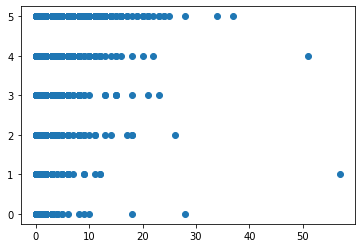

In [ ]:
%matplotlib inline

X = exclamation_array
y = rating
plt.scatter(X, y)
print(X)

In [ ]:
X = np.array(X)
X = X.reshape(-1,1)
print(X)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
reg = lm.LinearRegression().fit(X, y)

In [ ]:
reg.score(X, y)

0.0182691902866019

In [ ]:
reg.coef_

array([0.07109019])

In [ ]:
reg.intercept_

3.688533040832031

In [ ]:
y_pred = reg.predict(X)

In [ ]:
from sklearn import metrics

In [ ]:
print("MSE",metrics.mean_squared_error(y,y_pred))

MSE 1.5231747404538287


### Q2

In [ ]:
length = [] 
for i in range(len(dataset)):
  length.append(len(dataset[i]["review_text"]))

In [ ]:
X = [length,exclamation_array]
X = np.array(X)
X = np.transpose(X)
print(X)

[[1326    0]
 [ 224    1]
 [ 118    0]
 ...
 [ 828    0]
 [ 379    0]
 [ 233    0]]


In [ ]:
reg = lm.LinearRegression().fit(X, y)

In [ ]:
reg.score(X, y)

0.019411177578252947

In [ ]:
reg.coef_

array([-4.12150653e-05,  7.52759173e-02])

In [ ]:
reg.intercept_

3.7175128077972013

In [ ]:
y_pred = reg.predict(X)

In [ ]:
print("MSE",metrics.mean_squared_error(y,y_pred))

MSE 1.5214029246165832


### Q3

In [ ]:
array = [] 
for i in range(5):
  tmp = []
  for elem in exclamation_array:
    temp = elem ** (i+1)
    tmp.append(temp)
  array.append(tmp)
  X = array
  X = np.array(X)
  X = np.transpose(X)
  reg = lm.LinearRegression().fit(X, y)
  y_pred = reg.predict(X)
  print("MSE", i+1 , metrics.mean_squared_error(y,y_pred))

MSE 1 1.5231747404538287
MSE 2 1.5046686106250915
MSE 3 1.4966845515179228
MSE 4 1.490447730223069
MSE 5 1.4896106953961648


### Q4

In [ ]:
train = []
tst = [] 
exc_train = exclamation_array[:5000]
exc_test = exclamation_array[5000:]

y = rating
y_train = y[:5000]
y_tst = y[5000:]


for i in range(5):
  tmp_train = []
  for elem in exc_train:
    temp = elem ** (i+1)
    tmp_train.append(temp)
  train.append(tmp_train)
  X_train = train
  # print(X)
  # X_test = X[0:]
  X_train = np.array(X_train)
  X_train = np.transpose(X_train)

  tmp_tst=[]
  for elem in exc_test:
    temp = elem ** (i+1)
    tmp_tst.append(temp)
  tst.append(tmp_tst)
  X_tst = tst
  # print(X)
  # X_test = X[0:]
  X_tst = np.array(X_tst)
  X_tst = np.transpose(X_tst)


  reg = lm.LinearRegression().fit(X_train, y_train)
  y_pred = reg.predict(X_tst)
  print("MSE", i+1 , metrics.mean_squared_error(y_tst,y_pred))

MSE 1 1.5248743859866296
MSE 2 1.497719925932245
MSE 3 1.4856632190311156
MSE 4 1.476733744007701
MSE 5 1.480957727255698


### Q5

In [ ]:
def f(x):
  sum = 0 
  for i in range(len(y_tst)):
    sum += abs(y_tst[i]-x)
  sum = sum / 5000
  return sum

In [ ]:
import scipy.optimize as opt
initial_guess = [0]
result = opt.minimize(f, initial_guess)
print(result)

      fun: 0.9070000022135435
 hess_inv: array([[1.7085899]])
      jac: array([0.02408186])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 132
      nit: 3
     njev: 60
   status: 2
  success: False
        x: array([3.99999999])


In [ ]:
print(f(4))

0.907


# Classification

### Q6

In [ ]:
from urllib.request import urlopen
def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

In [ ]:
dataset = list(parseDataFromURL("http://cseweb.ucsd.edu/classes/fa19/cse258-a/data/beer_50000.json"))

In [ ]:
gender_valid = [d for d in dataset if 'user/gender' in d]

In [ ]:
print(len(gender_valid))

20403


#### Hot encode

In [ ]:
for i in range(len(gender_valid)):
  if(gender_valid[i]['user/gender'] == 'Female'):
    gender_valid[i]['user/gender'] = 1
  else:
    gender_valid[i]['user/gender'] = 0


#### Classification

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
def feature(datum):
  feat = [1]
  feat.append(datum['review/text'].count('!'))
  return feat

In [ ]:
X = [feature(d) for d in gender_valid]

In [ ]:
def feature(datum):
  feat = []
  feat.append(datum['user/gender'])
  return feat

In [ ]:
y = [feature(d)[0] for d in gender_valid]

In [ ]:
print(len(y))

20403


In [ ]:
y[21]

1

In [ ]:
classifier = LogisticRegression().fit(X, y)
y_ = classifier.predict(X)

In [ ]:
y_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
fp = 0
fn = 0
tp = 0
tn = 0
for i in range(len(y)):
  if(y_[i] ==  y[i] == 1):
    tp += 1
  elif(y_[i] ==  y[i] == 0):
    tn += 1
  elif(y_[i] == 0 and y[i] == 1):
    fn += 1
  else:
    fp += 1
    

In [ ]:
print(fn,fp,tn,tp)
x = 1 - 0.5 * (tp / (tp + fn) + tn / (tn + fp))
print(x)

308 0 20095 0
0.5


In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y, y_)

0.5

### Q7

In [ ]:
classifier = LogisticRegression(class_weight='balanced').fit(X, y)

In [ ]:
y_ = classifier.predict(X)

In [ ]:
fp = 0
fn = 0
tp = 0
tn = 0
for i in range(len(y)):
  if(y_[i] ==  y[i] == 1):
    tp += 1
  elif(y_[i] ==  y[i] == 0):
    tn += 1
  elif(y_[i] == 0 and y[i] == 1):
    fn += 1
  else:
    fp += 1

In [ ]:
print(fn,fp,tn,tp)
x = 1 - 0.5 * (tp / (tp + fn) + tn / (tn + fp))
print(x)

220 3763 16332 88
0.4507731134255145


### Q8

In [ ]:
scores = classifier.decision_function(X)
scores_ = list(zip(scores, y))
scores_.sort(reverse=True)
sorted_ = [x[1] for x in scores_]

precisionlist = []
for i in range(5):
  precisionlist.append(sum(sorted_[:10**i])/10**i)

print(precisionlist)

[0.0, 0.0, 0.03, 0.033, 0.0308]
